In [1]:
import bottleneck as bn
import matplotlib
import matplotlib.dates as mdates
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scienceplots
import scipy
import scipy.signal
import scipy.special
import scipy.stats
import sklearn.decomposition
import astropy.io
import datetime
import astropy.time
import pandas as pd

from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

figsize_short = (8, 4)
figsize_normal = (8, 6)
figsize_tall = (8, 8)
plt.rcParams['figure.figsize'] = figsize_short
plt.rcParams['axes.labelpad'] = 6.0
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.framealpha'] = 0.8
plt.rcParams['legend.edgecolor'] = 'none'


title_font = {'fontsize': 16, 'weight': 'bold', 'style': 'italic'}
path_effect = [pe.withStroke(linewidth=2.0, foreground="k")]

read_path = 'docs/Data/'
save_path = 'docs/Figure/'

perula_df = pd.read_csv(read_path + 'matlab_perula.txt', header = None, sep = '\s+')
matlab_perula = matplotlib.colors.LinearSegmentedColormap.from_list('matlab_perula', np.array(perula_df))

jet_df = pd.read_csv(read_path + 'matlab_jet.txt', header = None, sep = '\s+')
matlab_jet = matplotlib.colors.LinearSegmentedColormap.from_list('matlab_jet', np.array(jet_df))

%matplotlib ipympl

<>:41: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14392\3118345031.py:41: SyntaxWarning: invalid escape sequence '\s'
  perula_df = pd.read_csv(read_path + 'matlab_perula.txt', header = None, sep = '\s+')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14392\3118345031.py:44: SyntaxWarning: invalid escape sequence '\s'
  jet_df = pd.read_csv(read_path + 'matlab_jet.txt', header = None, sep = '\s+')


cmor0.073-1.0


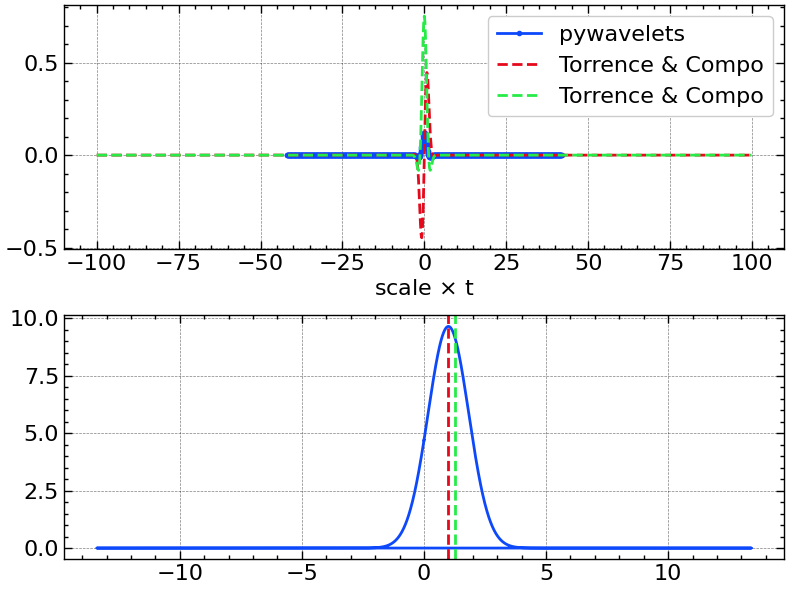

In [1]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])
%matplotlib ipympl

plt.close()
plt.figure(figsize = (8, 6))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

eta = np.linspace(-2, 2, 2 ** 10, endpoint=False)
deta = eta[1] - eta[0]
omega0 = 1.2

B, C = 2 * (omega0 / 2 / np.pi) ** 2, 1.0
print(f"cmor{B:.3f}-{C:.1f}")
[psi, x] = pywt.ContinuousWavelet(f"cmor{B:.2f}-{C:.1f}").wavefun(10)

ax1.plot(x * np.sqrt(2 / B), np.real(psi) / np.sqrt((psi.real ** 2).sum()) * (B / 2) ** 0.25, 'o-', label = 'pywavelets')

x = np.linspace(-100, 100, 2 ** 10, endpoint=False)
dx = x[1] - x[0]
psi_r = (np.pi ** -0.25) * np.exp(-x * x / 2) * np.cos( omega0 * x)
psi_i = (np.pi ** -0.25) * np.exp(-x * x / 2) * np.sin( omega0 * x)
psi = psi_r + 1j * psi_i
# psi -= np.mean(psi)
# psi /= np.sqrt(np.sum(psi ** 2))

ax1.plot(x, psi_i, '--', label = 'Torrence & Compo')
ax1.plot(x, psi_r, '--', label = 'Torrence & Compo')

n = psi.size
n = 2 ** 16
ax2.plot((np.fft.fftfreq( n = n, d = dx)) / (omega0 / 2 / np.pi), np.abs(np.fft.fft(psi, n = n)))

ax2.axvline( 1, color='C1', linestyle='--', label='Fourier Frequency')
ax2.axvline( (omega0 + np.sqrt(2 + omega0 ** 2)) / (2 * omega0), color='C2', linestyle='--', label='Fourier Frequency')

# ax2.plot((ssqueezepy.Wavelet(('morlet', {'mu': 6.0})).xifn()), (np.abs(ssqueezepy.Wavelet(('morlet', {'mu': 6.0})).psifn())))
# ax2.set_xlim(0.0, 2.0)

ax1.legend()
# ax1.plot(, 'C0o-')
ax1.set_xlabel(r'scale $\times$ t')
plt.tight_layout()
plt.show()

In [3]:
from scipy.optimize import brentq

def transcendental_eq(x, omega0):
    # 2 x^2 (1 - e^{-omega0 x}) - 2 omega0 x - 1 + e^{-omega0 x} = 0
    return 2*x**2*(1 - np.exp(-omega0*x)) \
           - 2*omega0*x \
           - 1 \
           + np.exp(-omega0*x)

omega0 = 10.0   # 举例
# 估计主根落在 x ≈ sqrt(3/2) ≈ 1.22 附近，我们选 [0.1, 5] 作为搜索区间
x_root = brentq(transcendental_eq, np.sqrt(1.5), (np.sqrt(omega0 ** 2 + 2) + omega0) / 1, args=(omega0,), xtol = 1e-12)

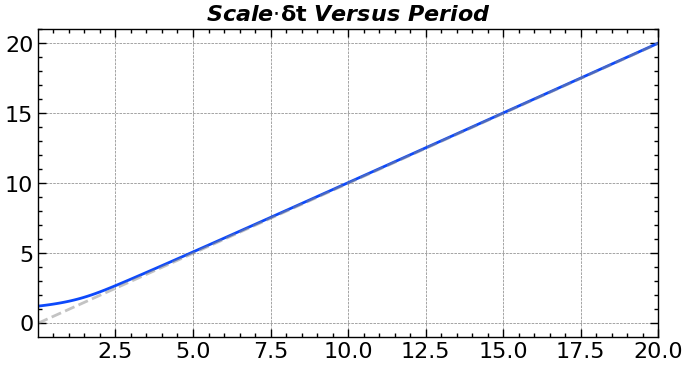

In [70]:
omega0 = np.geomspace(0.01, 20, 100)
x0 = np.zeros_like(omega0)
for idx in range(len(omega0)):
    x0[idx] = brentq(transcendental_eq, np.sqrt(1.5), (np.sqrt(omega0[idx] ** 2 + 2) + omega0[idx]) / 1, args=(omega0[idx],), xtol = 1e-12)

plt.close()
ax1 = plt.subplot()

ax1.plot(omega0, x0, )
ax1.plot(omega0, omega0, '#888888', alpha = 0.5)

# def x_approx(omega0):
#     f = np.log(omega0)
#     return (omega0 + np.sqrt(1.5) * f) / (1.0 + f)

# ax1.plot(omega0, x_approx(omega0))
# ax1.set_ylim(0, 1.2)
# ax1_twinx = ax1.twinx()
# ax1_twinx.plot(omega0, 1 - omega0 / x0, 'C1--')
# ax1_twinx.set_ylim(0, 1.0)
# ax1.axvspan(omega0[(x0 / omega0 < 1.05)][0], omega0[-1], color = '#888888', alpha = 0.5)
ax1.set_title(r'Scale$\cdot\mathbf{\delta t}$ Versus Period', **title_font)
# ax1.set_xscale('log')
ax1.autoscale(axis = 'x', tight=True)

plt.show()

4.91649216460117


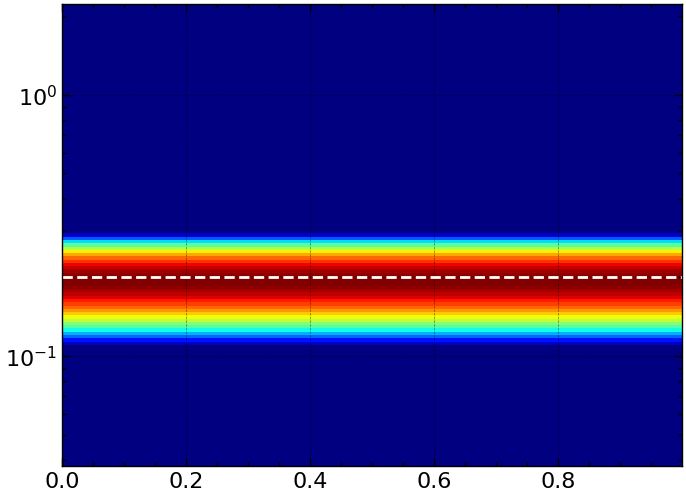

In [93]:
import matplotlib.colors
N = 2 ** 14
t = np.linspace(0, 1, N, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt
padtyle = None
omega = 5.0 * 2 * np.pi
sig_cos = np.cos(omega * t)
sig_sin = np.sin(omega * t)

omega0 = .2
mu = omega0
scales = np.geomspace(2 ** 7, 2 ** 13, 12 * 12, endpoint = False)[:-3]
# scales = np.geomspace(2 ** 1, 2 ** 13, 12 * 12, endpoint = False)[:-3]

import ssqueezepy
coef_cos, _ = ssqueezepy.cwt(sig_cos, ('morlet', {'mu': mu}), scales = scales.astype(np.float32), fs = fs, l1_norm = False, padtype = padtyle)
coef_sin, _ = ssqueezepy.cwt(sig_sin, ('morlet', {'mu': mu}), scales = scales.astype(np.float32), fs = fs, l1_norm = False, padtype = padtyle)

plt.close()
ax1 = plt.subplot(1, 1, 1)

scale_to_period = 4 * np.pi / (mu + np.sqrt(2 + mu ** 2))

x0 = brentq(transcendental_eq, np.sqrt(1.5), (np.sqrt(omega0 ** 2 + 2) + omega0) / 1, args=(omega0,), xtol = 1e-12)
scale_to_period = 2 * np.pi / x0

print(scale_to_period)
period = scale_to_period * scales * dt

power = np.abs(coef_cos) ** 2 + np.abs(coef_sin) ** 2
ax1.pcolormesh(t, period, power, cmap = 'jet', norm = matplotlib.colors.LogNorm(vmax = np.max(power), vmin = np.max(power) / 2), zorder = -1)
ax1.axhline(2 * np.pi / omega, color='w', linestyle='--', label='Fourier Frequency')

ax1.set_yscale('log')

plt.show()

In [141]:
import pywt

wavlist = pywt.wavelist(kind="continuous")
dwt_families = np.array(['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey'])
cwt_families = np.array(['gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor'])
selected_dwt_wavelets = [pywt.wavelist(fam)[0] for fam in dwt_families if len(pywt.wavelist(fam)) > 0] + \
                    [pywt.wavelist(fam)[len(pywt.wavelist(fam)) // 2] for fam in dwt_families if len(pywt.wavelist(fam)) > 1] + \
                    [pywt.wavelist(fam)[-1] for fam in dwt_families if len(pywt.wavelist(fam)) > 2]
# Add CWT wavelets
selected_cwt_wavelets = [pywt.wavelist(fam)[0] for fam in cwt_families if len(pywt.wavelist(fam)) > 0] + \
                        [pywt.wavelist(fam)[len(pywt.wavelist(fam)) // 2] for fam in cwt_families if len(pywt.wavelist(fam)) > 1] + \
                        [pywt.wavelist(fam)[-1] for fam in cwt_families if len(pywt.wavelist(fam)) > 2]
selected_cwt_wavelets = sorted(selected_cwt_wavelets)
selected_dwt_wavelets = sorted(selected_dwt_wavelets)

wavlist = selected_cwt_wavelets

for i in range(len(wavlist)):
    if wavlist[i] in ['cmor', 'shan']:
        wavlist[i] += '1.0-1.0'
    elif wavlist[i] == 'fbsp':
        wavlist[i] += '1.0-1.5-1.0'

wavlist.append('cmor3.0-1.0')
wavlist.append('cmor6.0-1.0')
wavlist.append('shan2.0-1.0')
wavlist.append('fbsp2.0-1.5-1.0')
wavlist = sorted(wavlist)

selected_cwt_wavelets = ['cgau1', 'cgau5', 'cgau8', 'cmor1.0-1.0', 'cmor3.0-1.0', 'cmor6.0-1.0', 'morl', 'fbsp1.0-1.5-1.0', 'fbsp2.0-1.5-1.0', 'mexh', 'shan1.0-1.0', 'shan2.0-1.0', 'gaus1', 'gaus5', 'gaus8']

selected_dwt_wavelets = ['bior1.1',
 'bior3.1',
 'bior6.8',
 'coif1',
 'coif17',
 'coif9',
 'db1',
 'db20',
 'db38',
 'rbio1.1',
 'rbio3.1',
 'rbio6.8',
 'sym11',
 'sym2',
 'sym20',
  'dmey',
 'haar',]

<>:19: SyntaxWarning: invalid escape sequence '\e'
<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\e'
<>:20: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14392\681124566.py:19: SyntaxWarning: invalid escape sequence '\e'
  ax.set_xlabel("$\eta$")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14392\681124566.py:20: SyntaxWarning: invalid escape sequence '\p'
  ax.set_ylabel("$\psi(\eta)$")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14392\681124566.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


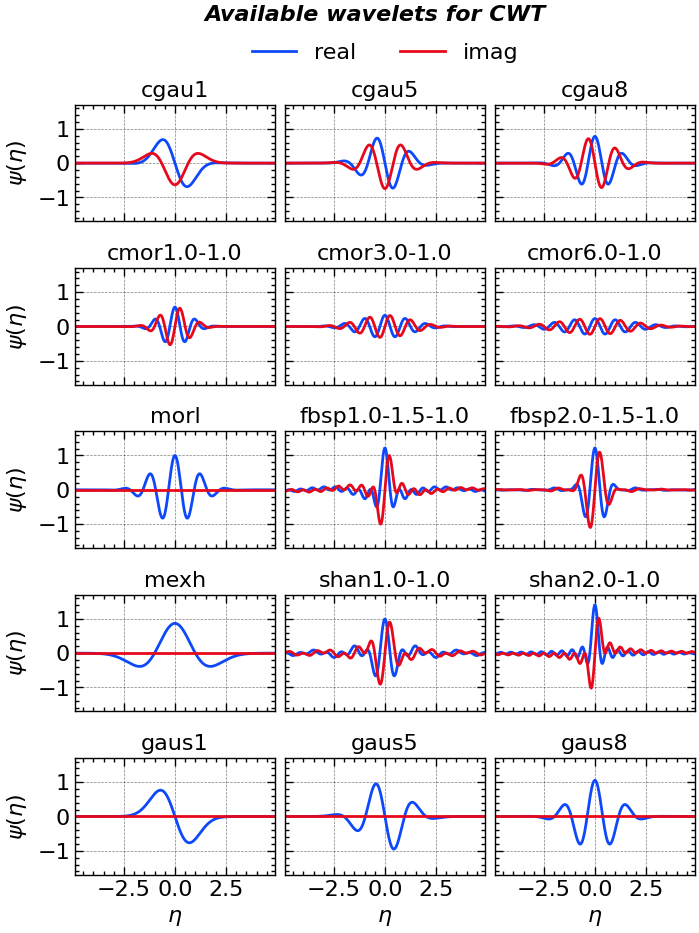

In [135]:
import matplotlib.pyplot as plt
import numpy as np

wavlist = ['cgau1', 'cgau5', 'cgau8', 'cmor1.0-1.0', 'cmor3.0-1.0', 'cmor6.0-1.0', 'morl', 'fbsp1.0-1.5-1.0', 'fbsp2.0-1.5-1.0', 'mexh', 'shan1.0-1.0', 'shan2.0-1.0', 'gaus1', 'gaus5', 'gaus8']

cols = 3
rows = (len(wavlist) + cols - 1) // cols
fig, axs = plt.subplots(rows, cols, figsize=(8, 10),
                        sharex=True, sharey=True, 
                        gridspec_kw={'wspace': 0.05, 'hspace': 0.40})
for ax, wavelet in zip(axs.flatten(), wavlist):
    # A few wavelet families require parameters in the string name

    [psi, x] = pywt.ContinuousWavelet(wavelet).wavefun(10)
    ax.plot(x, np.real(psi), label="real")
    # if np.any(np.imag(psi)):
        # Only plot imaginary part if it exists
    ax.plot(x, np.imag(psi), label="imag", linestyle='-')
    ax.set_xlabel("$\eta$")
    ax.set_ylabel("$\psi(\eta)$")
    ax.set_title(wavelet)
    ax.set_xlim([-4.9, 4.9])
    ax.set_ylim([-1.7, 1.7])

fig.align_labels()

for ax in axs[:, 1:].flatten():
    ax.set_ylabel("")

for ax in axs.flatten()[:-cols]:
    ax.set_xlabel("")

axs.flatten()[1].legend(loc="upper center", ncol=2, bbox_to_anchor = (0.5, 1.7), frameon=False, fontsize=16)
plt.suptitle("Available wavelets for CWT", **title_font)
plt.tight_layout()
# plt.show()
plt.savefig(save_path + 'figure_cwt_family.png',bbox_inches='tight',dpi=300)


In [136]:
import pywt

sig = [1, 2, 3, 4, 5, 6]
cA, cD = pywt.dwt(sig, 'db1')  # Haar wavelet
print("Approximation (cA):", cA)
print("Detail (cD):", cD)

# Reconstruction
reconstructed = pywt.idwt(cA, cD, 'db1')
print("Reconstructed:", reconstructed)

Approximation (cA): [2.12132034 4.94974747 7.77817459]
Detail (cD): [-0.70710678 -0.70710678 -0.70710678]
Reconstructed: [1. 2. 3. 4. 5. 6.]


<>:33: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14392\4028431697.py:33: SyntaxWarning: invalid escape sequence '\d'
  ax1.set_xlabel('Time [$\delta t$]')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14392\4028431697.py:33: SyntaxWarning: invalid escape sequence '\d'
  ax1.set_xlabel('Time [$\delta t$]')


ValueError: coefficient shape mismatch

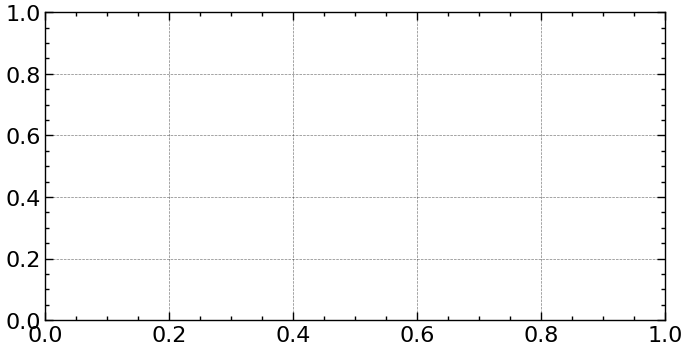

In [ ]:
# Generate synthetic noisy sinusoidal signal
np.random.seed(0)
N = 2 ** 10
t = np.linspace(0, 1, N)
sig_clean = np.sin(2 * np.pi * 5 * t)
sig_nosiy = sig_clean + np.random.normal(0, 0.3, size=N)

# Wavelet decomposition
wavelet = 'db6'
coeffs = pywt.wavedec(sig_nosiy, wavelet)
cA, cDs = coeffs[0], coeffs[1:]

# Threshold calculation
sigma = np.median(np.abs(cDs[-1])) / 0.6745
threshold = sigma * np.sqrt(2 * np.log(N))

# Soft thresholding
denoised_details = [pywt.threshold(d, threshold, mode='soft') for d in cDs]

# Reconstruction
denoised_signal = pywt.waverec([cA] + denoised_details, wavelet)

plt.close()
plt.figure(figsize = figsize_short)
ax1 = plt.subplot()
ax1.plot(sig_nosiy, label='Noisy Signal', alpha=0.5)
ax1.legend()
ax1.plot(denoised_signal, label='Denoised Signal', color='C1')
ax1.set_ylabel('Intensity [Arb]')
ax1.set_xlabel('Time [$\delta t$]')
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14392\641530300.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


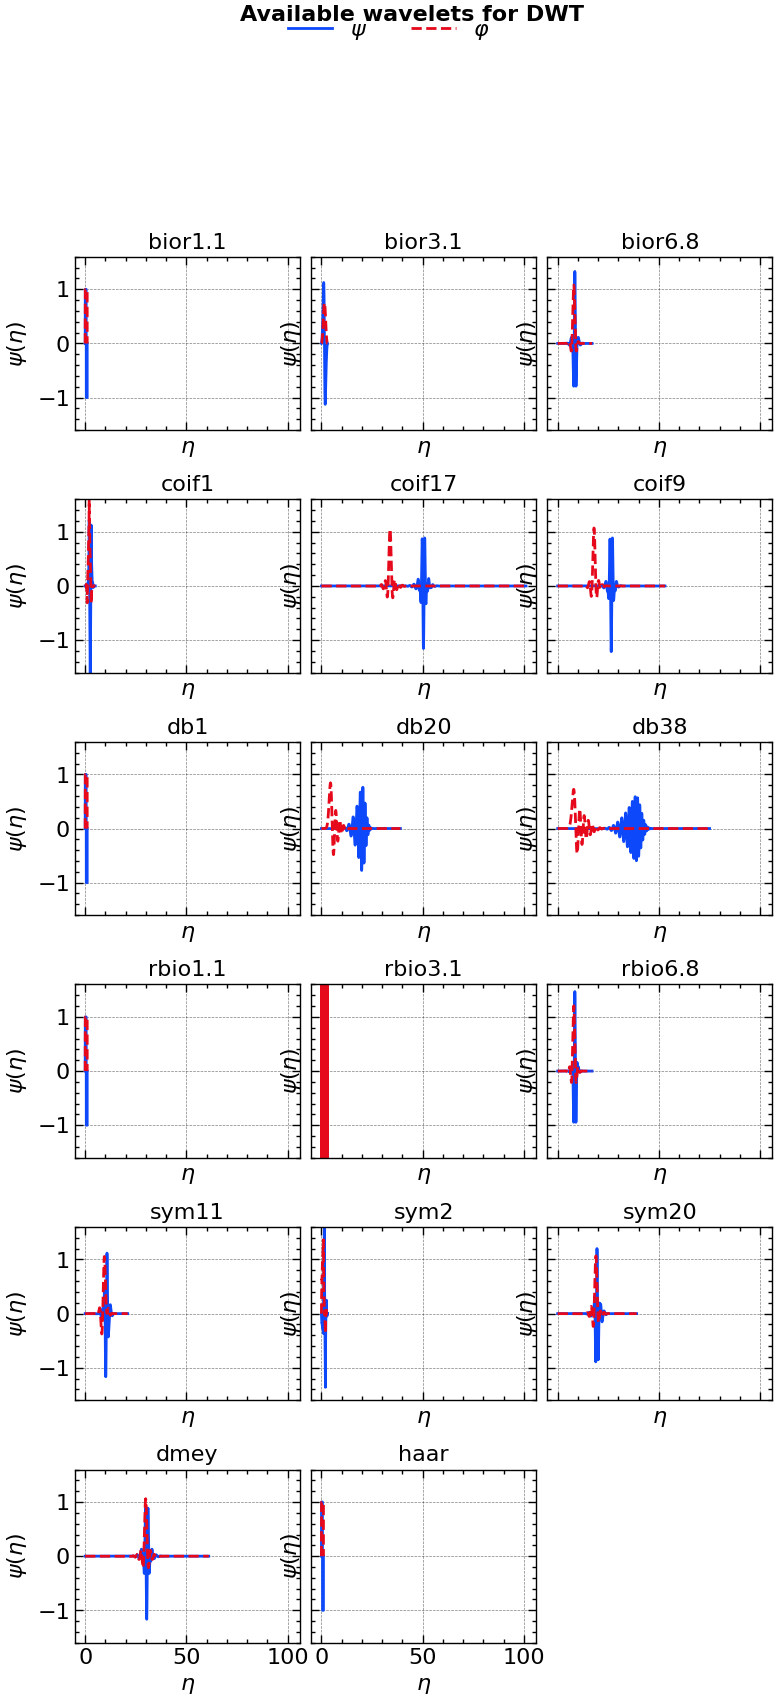

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------- parameters ----------------------------
# selected_dwt_wavelets = [...]           # your list
title_font = {"fontsize": 16, "weight": "bold"}
cols = 3
rows = (len(selected_dwt_wavelets) + cols - 1) // cols
x_common_max = 4.8                      # the length you want on every axis
# --------------------------------------------------------------------

fig, axs = plt.subplots(rows, cols, figsize=(9, 3.0 * rows),
                        sharex=True, sharey=True,
                        gridspec_kw={'wspace': 0.05, 'hspace': 0.40})

for ax, wname in zip(axs.flatten(), selected_dwt_wavelets):
    wav = pywt.Wavelet(wname)

    # ---------------- fetch wavelet functions -----------------------
    if 'bio' in wname:                  # biorthogonal returns 5 arrays
        *_unused, phi, psi, x = wav.wavefun()
    else:                               # orthogonal families
        phi, psi, x = wav.wavefun()

    # ------------- ALIGN SUPPORT: shift to 0, stretch to 4.8 --------
    x = x - x[0]                        # left edge → 0
    x = x * (x_common_max / x[-1])      # right edge → 4.8

    # ---------------------------- PLOT ------------------------------
    ax.plot(x, psi, label=r'$\psi$')
    ax.plot(x, phi, label=r'$\varphi$')
    ax.set_title(wname)
    ax.set_xlim(0.0, x_common_max)
    ax.set_ylim(-1.6, 1.6)
    ax.set_xlabel(r'$\eta$')
    ax.set_ylabel(r'$\psi(\eta)$')

# ---------- tidy up (delete unused axes, one shared legend) ----------
for ax in axs.flatten()[len(selected_dwt_wavelets):]:
    fig.delaxes(ax)

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc="upper center", frameon=False)

plt.suptitle("Available wavelets for DWT", **title_font, y=1.02)
plt.tight_layout()
plt.show()


In [138]:
selected_cwt_wavelets, selected_dwt_wavelets

(['cgau1',
  'cgau5',
  'cgau8',
  'cmor1.0-1.0',
  'cmor3.0-1.0',
  'cmor6.0-1.0',
  'morl',
  'fbsp1.0-1.5-1.0',
  'fbsp2.0-1.5-1.0',
  'mexh',
  'shan1.0-1.0',
  'shan2.0-1.0',
  'gaus1',
  'gaus5',
  'gaus8'],
 ['bior1.1',
  'bior3.1',
  'bior6.8',
  'coif1',
  'coif17',
  'coif9',
  'db1',
  'db20',
  'db38',
  'rbio1.1',
  'rbio3.1',
  'rbio6.8',
  'sym11',
  'sym2',
  'sym20',
  'dmey',
  'haar'])

In [111]:
help(wav.wavefun)

Help on method wavefun in module pywt._extensions._pywt:

wavefun(level=8) method of pywt._extensions._pywt.Wavelet instance
    wavefun(self, level=8)

    Calculates approximations of scaling function (`phi`) and wavelet
    function (`psi`) on xgrid (`x`) at a given level of refinement.

    Parameters
    ----------
    level : int, optional
        Level of refinement (default: 8).

    Returns
    -------
    [phi, psi, x] : array_like
        For orthogonal wavelets returns scaling function, wavelet function
        and xgrid - [phi, psi, x].

    [phi_d, psi_d, phi_r, psi_r, x] : array_like
        For biorthogonal wavelets returns scaling and wavelet function both
        for decomposition and reconstruction and xgrid

    Examples
    --------
    >>> import pywt
    >>> # Orthogonal
    >>> wavelet = pywt.Wavelet('db2')
    >>> phi, psi, x = wavelet.wavefun(level=5)
    >>> # Biorthogonal
    >>> wavelet = pywt.Wavelet('bior3.5')
    >>> phi_d, psi_d, phi_r, psi_r, x = wavel

In [61]:
families = pywt.wavelist(kind='discrete')
len(families)

106